# Classification Analysis of Mouse Strains

Aalysis of manual classification results for different mouse strains.

1. **Data Loading and Preparation**: Load the dataset and split it into training and testing sets.
2. **First Labeller Analysis**: Load and analyze the classification results from the first labeller.
3. **Second Labeller Analysis**: Load and analyze the classification results from the second labeller.
4. **Third Labeller Analysis**: Load and analyze the classification results from the third labeller.
5. **Fleiss's Kappa Calculation**: Calculate Fleiss's Kappa to measure the agreement between the labellers.
6. **Average Metrics Calculation**: Calculate and display the average recall, specificity, and precision metrics for the classifications.


In [ ]:
%pylab

%matplotlib inline
import pandas as pd
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
import sys
sys.path.append('./Paper')
sys.path.append('../src')
import abrTools as at
import figureTools as ft

Using matplotlib backend: <object object at 0x108cb6240>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the data and create the train and test sets to determine the mouse IDs used for testing.
X_train,  X_test,y_train,y_test,m_train,m_test,dataVersion = at.createClassificationDataset(datafolder='../data',test_size=0.25,oversample=False,ages=[1,],frequencies=[100],returnMouseIDs=True)


The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})


## 1 - First labeller

In [23]:
# Load the classification results. Remove .loc[m_test] to get the full dataset classification results not just the one on the test set
dfFc_global = pd.read_csv('../data/ManualClassificationResults/BlindClassification_FC/classificationDataFrame.csv',index_col=0)#.loc[m_test]
dfFc_click = pd.read_csv('../data//ManualClassificationResults/BlindClassification_FC/classificationDataFrame_click.csv',index_col=0)#.loc[m_test] 

In [24]:
# Print the classification report
print(classification_report(dfFc_global['Strain'],dfFc_global['Guess']))

print(classification_report(dfFc_click['Strain'],dfFc_click['Guess']))

              precision    recall  f1-score   support

          6N       0.86      0.62      0.72        50
    Repaired       0.72      0.91      0.80        54

    accuracy                           0.77       104
   macro avg       0.79      0.76      0.76       104
weighted avg       0.79      0.77      0.76       104

              precision    recall  f1-score   support

          6N       0.56      0.38      0.45        50
    Repaired       0.56      0.72      0.63        54

    accuracy                           0.56       104
   macro avg       0.56      0.55      0.54       104
weighted avg       0.56      0.56      0.54       104



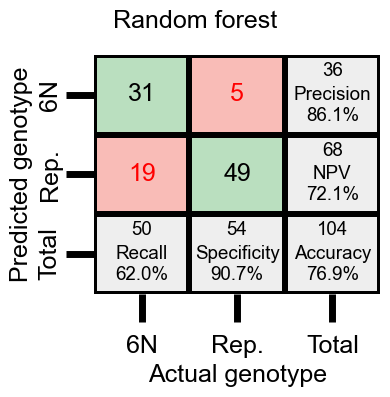

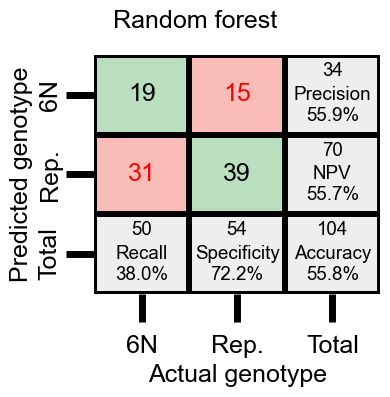

In [25]:
# Confusion matrices on Global and Click datasets
dd=ft.makeConfMatrix(dfFc_global['Strain'],dfFc_global['Guess'],'Global',figsize=(4,4),fontSize=18)

dd=ft.makeConfMatrix(dfFc_click['Strain'],dfFc_click['Guess'],'Click',figsize=(4,4),fontSize=18)


## 2 - Second labeller

In [26]:
# Load the classification results for the WM classification. Remove .loc[m_test] to get the full dataset classification results not just the one on the test set.
dfWM_global = pd.read_csv('../data/ManualClassificationResults/BlindClassification_WM/classificationDataFrame.csv',index_col=0)#.loc[m_test]
dfWM_click = pd.read_csv('../data/ManualClassificationResults/BlindClassification_WM/classificationDataFrame_click.csv',index_col=0)#.loc[m_test]

In [27]:
print(classification_report(dfWM_global['Strain'],dfWM_global['Guess']))

print(classification_report(dfWM_click['Strain'],dfWM_click['Guess']))

              precision    recall  f1-score   support

          6N       0.66      0.82      0.73        50
    Repaired       0.79      0.61      0.69        54

    accuracy                           0.71       104
   macro avg       0.72      0.72      0.71       104
weighted avg       0.73      0.71      0.71       104

              precision    recall  f1-score   support

          6N       0.55      0.54      0.55        50
    Repaired       0.58      0.59      0.59        54

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104



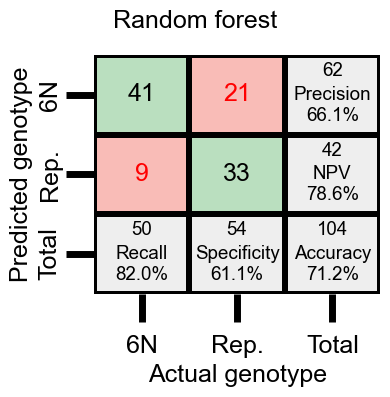

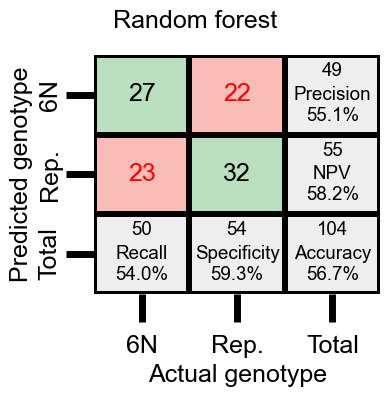

In [28]:
dd=ft.makeConfMatrix(dfWM_global['Strain'],dfWM_global['Guess'],'Global',figsize=(4,4),fontSize=18)

dd=ft.makeConfMatrix(dfWM_click['Strain'],dfWM_click['Guess'],'Click',figsize=(4,4),fontSize=18)


# 3 - Third labeller

In [29]:
# Load the classification results for the JJ classification. Remove .loc[m_test] to get the full dataset classification results not just the one on the test set.
dfJJ_global = pd.read_csv('../data/ManualClassificationResults/BlindClassification_Ginny/classificationDataFrame.csv',index_col=0)#.loc[m_test]
dfJJ_click = pd.read_csv('../data/ManualClassificationResults/BlindClassification_Ginny/classificationDataFrame_click.csv',index_col=0)#.loc[m_test]

In [30]:
print(classification_report(dfJJ_global['Strain'],dfJJ_global['Guess']))

print(classification_report(dfJJ_click['Strain'],dfJJ_click['Guess']))

              precision    recall  f1-score   support

          6N       0.93      0.56      0.70        50
    Repaired       0.70      0.96      0.81        54

    accuracy                           0.77       104
   macro avg       0.82      0.76      0.76       104
weighted avg       0.81      0.77      0.76       104

              precision    recall  f1-score   support

          6N       0.58      0.42      0.49        50
    Repaired       0.57      0.72      0.64        54

    accuracy                           0.58       104
   macro avg       0.58      0.57      0.56       104
weighted avg       0.58      0.58      0.57       104



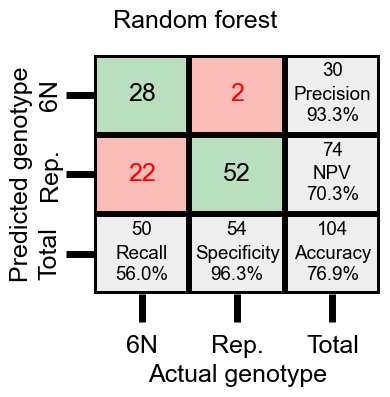

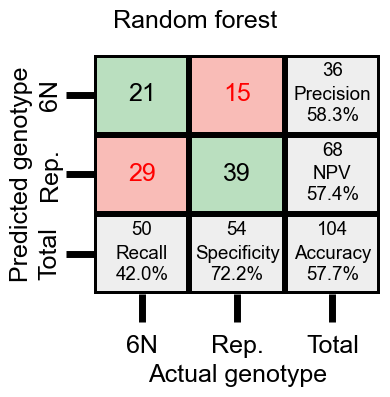

In [31]:
dd=ft.makeConfMatrix(dfJJ_global['Strain'],dfJJ_global['Guess'],'Global',figsize=(4,4),fontSize=18)

dd=ft.makeConfMatrix(dfJJ_click['Strain'],dfJJ_click['Guess'],'Click', figsize=(4,4),fontSize=18)

# Calculate Fleiss's Kappa

Calculate the kappa value ranges from -1 to 1, where values closer to 1 indicate higher agreement beyond chance, and values close to 0 or negative indicate little or no agreement beyond chance.

In [32]:
dfWM_global2 = dfWM_global.copy()
dfWM_global2['Guess_WM'] = dfWM_global2['Guess']
dfJJ_global2 = dfJJ_global.copy()
dfJJ_global2['Guess_JJ'] = dfJJ_global2['Guess']
df_global= pd.concat((dfFc_global['Guess'],dfWM_global2['Guess_WM'],dfJJ_global2['Guess_JJ']),axis=1)


dfWM_click2 = dfWM_click.copy()
dfWM_click2['Guess_WM'] = dfWM_click2['Guess']

dJJ_click2 = dfJJ_click.copy()
dJJ_click2['Guess_JJ'] = dJJ_click2['Guess']
df_click= pd.concat((dfFc_click['Guess'],dfWM_click2['Guess_WM'],dJJ_click2['Guess_JJ']),axis=1)

In [33]:
df2_global = pd.DataFrame(index=df_global.index,columns=['6N','Repaired'])
for j,_ in df2_global.iterrows():
    el = df_global.loc[j]
    df2_global.loc[j,'6N'] = sum(el=='6N')
    df2_global.loc[j,'Repaired'] = sum(el=='Repaired')
ratings=df2_global.values


df2_click = pd.DataFrame(index=df_click.index,columns=['6N','Repaired'])
for j,_ in df2_click.iterrows():
    el = df_click.loc[j]
    df2_click.loc[j,'6N'] = sum(el=='6N')
    df2_click.loc[j,'Repaired'] = sum(el=='Repaired')
ratings_click=df2_click.values

In [36]:
from statsmodels.stats.inter_rater import fleiss_kappa
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Convert ratings list to numpy array
ratings_array = np.array(ratings)

# Calculate Fleiss' Kappa
kappa = fleiss_kappa(ratings_array)
print("Fleiss' Kappa, Global:", kappa)

# Convert ratings list to numpy array
ratings_array = np.array(ratings_click)

# Calculate Fleiss' Kappa
kappa = fleiss_kappa(ratings_array)
print("Fleiss' Kappa, Click:", kappa)

Fleiss' Kappa, Global: 0.5628396739130431
Fleiss' Kappa, Click: 0.11699394783820366


# Calculate average metrics

In [37]:
from sklearn.metrics import recall_score, precision_score

In [38]:
recallFC = recall_score(dfFc_global['Strain'],dfFc_global['Guess'],pos_label='6N')
specifFC = recall_score(dfFc_global['Strain'],dfFc_global['Guess'],pos_label='Repaired')
precisionFC = precision_score(dfFc_global['Strain'],dfFc_global['Guess'],pos_label='6N')

recallWM = recall_score(dfWM_global['Strain'],dfWM_global['Guess'],pos_label='6N')
specifWM = recall_score(dfWM_global['Strain'],dfWM_global['Guess'],pos_label='Repaired')
precisionWM = precision_score(dfWM_global['Strain'],dfWM_global['Guess'],pos_label='6N')

recallJJ = recall_score(dfJJ_global['Strain'],dfJJ_global['Guess'],pos_label='6N')
specifJJ = recall_score(dfJJ_global['Strain'],dfJJ_global['Guess'],pos_label='Repaired')
precisionJJ = precision_score(dfJJ_global['Strain'],dfJJ_global['Guess'],pos_label='6N')

results = pd.DataFrame({'recall':[recallFC,recallWM,recallJJ],
                        'specificity':[specifFC,specifWM,specifJJ],
                        'precision':[precisionFC,precisionWM,precisionJJ]}, index=['FC','WM','JJ'])

In [39]:
results.mean(0)


recall         0.666667
specificity    0.827160
precision      0.818578
dtype: float64

In [40]:
results.std(0)

recall         0.136137
specificity    0.189155
precision      0.140921
dtype: float64

In [41]:
recallFC = recall_score(dfFc_click['Strain'], dfFc_click['Guess'], pos_label='6N')
specifFC = recall_score(dfFc_click['Strain'], dfFc_click['Guess'], pos_label='Repaired')
precisionFC = precision_score(dfFc_click['Strain'], dfFc_click['Guess'], pos_label='6N')

recallWM = recall_score(dfWM_click['Strain'], dfWM_click['Guess'], pos_label='6N')
specifWM = recall_score(dfWM_click['Strain'], dfWM_click['Guess'], pos_label='Repaired')
precisionWM = precision_score(dfWM_click['Strain'], dfWM_click['Guess'], pos_label='6N')

recallJJ = recall_score(dfJJ_click['Strain'], dfJJ_click['Guess'], pos_label='6N')
specifJJ = recall_score(dfJJ_click['Strain'], dfJJ_click['Guess'], pos_label='Repaired')
precisionJJ = precision_score(dfJJ_click['Strain'], dfJJ_click['Guess'], pos_label='6N')

results = pd.DataFrame({
    'recall': [recallFC, recallWM, recallJJ],
    'specificity': [specifFC, specifWM, specifJJ],
    'precision': [precisionFC, precisionWM, precisionJJ]
}, index=['FC', 'WM', 'JJ'])

In [42]:
results.agg([mean,std])

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_28979/1406897570.py:1: FutureWarning: The provided callable <function mean at 0x108d496c0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  results.agg([mean,std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_28979/1406897570.py:1: FutureWarning: The provided callable <function std at 0x108d497e0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  results.agg([mean,std])


,recall,specificity,precision
mean,0.446667,0.679012,0.564392
std,0.083267,0.074842,0.016861
